## Evaluation  
(class_evaluation)=
### Bias Variance Tradeoff
Similar to the Bias-Variance Tradeoff in Regression, we can formulate the bias-variance tradeoff for classification. 
```{prf:theorem} bias-variance tradeoff for classification
The EPE for any observation $\mathbf{x}_0$, having the label $y$ and prediction $\hat{y}_\mathcal{D}$ (depending on the training data $\mathcal{D}$) and most frequent prediction $\mathrm{mode}(\hat{y}_\mathcal{D})$ can be deconstructed into three parts:
\begin{align*}
    \mathbb{E}_{y,\mathcal{D}}[L_{01}(y,\hat{y}_\mathcal{D})]  
    = c_1\underbrace{\mathbb{E}_y[L_{01}(y,y^*)]}_{noise} &+\underbrace{L_{01}(y^*,\mathrm{mode}(\hat{y}_\mathcal{D}))]}_{bias}\\ &+c_2\underbrace{\mathbb{E}_\mathcal{D}[L_{01}(\mathrm{mode}(\hat{y}_\mathcal{D}),\hat{y}_\mathcal{D})}_{variance}] 
\end{align*}
where
\begin{align*}
c_1 &= p_{\mathcal{D}}(\hat{y}_{\cal D} = y^*)-p_{\cal D}(\hat{y}_{\cal D}=y\mid y^*\neq y)\\
c_2&= \begin{cases}
1 & \text{ if } \mathrm{mode}(\hat{y}_\mathcal{D}) = y^*\\
-p_{\mathcal{D}}(\hat{y}_\mathcal{D}=y^*\mid \hat{y}_\mathcal{D}\neq\mathrm{mode}(\hat{y}_\mathcal{D})) & \text{ otherwise}
\end{cases}
\end{align*}
```
Just like in regression, we decompose the EPE into three parts: a noise, a bias and a variance term. The noise part is again inherent to the data and not dependent on the model. In classification, the noise describes how many labels are wrong in the dataset.
```{prf:corollary} 
The classification noise random variable is equal to the probability that the label is not equal to the _true_ label
$$\mathbb{E}_y[L_{01}(y,y^*)]=p(y\neq y^*)$$
```
```{prf:proof}
According to the definition of the expected value of a random variable with finitely many outcomes
$$\mathbb{E}[x] = x_1p(x=x_1) + \ldots + x_lp(x=x_l)$$
we have
\begin{align*}
\mathbb{E}_y[L_{01}(y,y^*)]&=1\cdot p(L_{01}(y,y^*)=1) + 0\cdot p(L_{01}(y,y^*)=0) \\
&=1\cdot p(y\neq y^*) + 0\cdot p(y=y^*) \\
&=p(y\neq y^*)
\end{align*}
```
The bias describes how far the predictions are from the true label when we aggregate the results over various classifiers. In regression, the aggregated regression model computed the mean over all regression models, in classification, the aggregated classifier predicts the majority vote of all classifiers. Lastly, the variance term describes the variance among the classifiers. Here, this is measured by the expected disagreement of the majority vote classifier and the indivdual classifiers.

{numref}`bias_variance_tradeoff1b_fig` plots the result of a simulation of the bias-variance computation. Given a set of training data sets $\mathcal{D}_1,\ldots \mathcal{D}_m$, we train one model on each training data set for varying levels of complexity. Each thin blue curve tracks how the prediction error changes when we vary the complexity of the model, while training on the same dataset. That is, we have as many blue curves as there are training data sets. The thick blue line represents the mean of the thin blue lines. The red curves track the prediction error on the test set and the thick red line averages the thin red lines. We can see how the models tend to overfit with increasing complexity, because they have a low training error but an increasing test error. The increase in the variance of the models increases the test error. For a low model complexity, the test error is largely increased by the training error, which indicates a high bias.   
```{figure} /images/classification/e2.png
---
height: 320px
name: bias_variance_tradeoff1b_fig
align: center
---
The prediction error as a function of model complexity (borrowed from {cite}`hastie2009elements`). 
```
Whether a classifier overfits or underfits depends on the model choice and their hyperparameters. For example, a linear classifier is not a good model choice for a nonlinear classification problem, or naive Bayes is not a good model choice if the features correlate. The table below lists the key parameters of our considered classifiers and how they influence over- and underfitting.

| Classifier      | Key Hyperparameter(s)        | Description                                                                 | Effect on Under/Overfitting                                 |
|-----------------|------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------|
| **k-NN**        | `k`     | Number of neighbors considered for classification                          | Small `k` → overfitting (very local); large `k` → underfitting (too smooth) |
| **Naive Bayes** | `alpha`     | Laplace smoothing variable                       | large values flatten the probabilities → increases NB tendency to underfit      |
| **Decision Tree** | `max_depth`                 | Maximum depth of the tree                                                  | Large depth → overfitting; small depth → underfitting        |
|                 | `min_samples_split`, `min_samples_leaf` | Minimum samples to split or keep as leaf                        | Larger values → less overfitting           |
| **Random Forest** | `n_estimators`                   | Number of trees in the ensemble                                             | Too few → underfitting; more trees → lower variance (not overfit easily) |
|                  | `max_features`                   | Features considered per split         | Lower → more diversity, less overfitting                         |
| **SVM**         | `C`                           | Regularization strength: margin softness                                   | Large `C` → more regularization → less overfitting |
|                 | `kernel`                     | Type of transformation (e.g., `linear`, `rbf`, `poly`)                     | Complex kernels → higher risk of overfitting                 |
|                 | `gamma` (RBF kernels)   | Controls influence of single training examples                             | High `gamma` → points are similar if they are very close → more overfitting (focus on local effects)|

### Typical Classification workflow
The evaluation in classification has two purposes: finding the best hyperparameters for a model (tuning) and to assess the fit of the model (assessing overfitting and underfitting). Doing both, requires a nested evaluation and training technique, which is detailed in 
{numref}`train_validate_test_02`. The training procedure in the *Repeat* rectangle is used to tune the hyperparameters. The test error is computed for the model with the best validation error. 
```{figure} /images/classification/train_validate_test_02.png
---
height: 300px
name: train_validate_test_02
align: center
---
A block diagram representing a typical ML workflow.
```
In the graphic, a train/validation/test split is used:

- **Training set**: used to fit the model.
- **Validation set**: used to tune hyperparameters and make model selection decisions.
- **Test set**: used only once for final model evaluation.

This approach may be sensitive to the choice of the specific validation and test set, but if we have large data and/or classifiers that take a long time to train, this is a valid approach. 

```{tikz}
\begin{tikzpicture}

% Whole dataset block
\node[draw, minimum width=12cm, minimum height=1cm, fill=gray!10] (data) {};

% Train, val, test blocks
\node[draw, minimum width=6cm, minimum height=1cm, fill=blue!20, anchor=west] at (data.west) (train) {Training Set};
\node[draw, minimum width=3cm, minimum height=1cm, fill=green!30, anchor=west] at (train.east) (val) {Validation Set};
\node[draw, minimum width=3cm, minimum height=1cm, fill=red!30, anchor=west] at (val.east) (test) {Test Set};

% Labels
\node[below=0.2cm of train] {\small e.g., 60\%};
\node[below=0.2cm of val] {\small e.g., 20\%};
\node[below=0.2cm of test] {\small e.g., 20\%};

\end{tikzpicture}
```

However, we can of course also perform cross validation, as we have already discussed it for regression (averaging an evaluation metric instead of the MSE). Whether we should use cross validation instead of a simple split, largely depends on whether we can afford it, based on training time and size of the dataset. 

In classification, we often use **stratified** k-fold cross-validation to preserve the class distribution in each fold. This is particularly important for imbalanced datasets.

````{warning} Avoid the human-in-the-loop 
Do not adjust the model parameters or hyper-parameters by guessing based on the testing accuracy / error. Do not allow the information containing in the testing data set leak to the training procedure.

```{figure} /images/classification/train_validate_test_03.png
---
height: 320px
name: train_validate_test_03
align: center
```
````

### Evaluation Metrics

Straightforward evaluation metrics are the $L_{01}$-loss and the accuracy, that put into relation how many errors/correct predictions a classifier makes in a dataset. Given a classifier $\hat{y}(\vvec{x})$, the accuracy of the classifier on dataset $\mathcal{D}$ containing $n$ data points is given as

\begin{align*}
\mathrm{Acc}(\hat{y},\mathcal{D}) &= \frac{\text{Correct predictions}}{\text{Total predictions}}\\
&= \frac1n \lvert\{(\vvec{x}_i,y_i)\in\mathcal{D}\mid \hat{y}(\vvec{x}_i)=y_i\}\rvert\\
&= 1- \frac1n\sum_{i=1}^n L_{01}(\hat{y}(\vvec{x}_i),y_i).
\end{align*}
The accuracy is a very simple metric that is often used because it's easy to understand. However, it may be misleading when classes are imbalanced.    
For example, consider a binary classification problem, where we have 950 data points belonging to class 1 and 50 data points belonging to class 2. If our classifier always predicts class 1, that is if it didn't learn anything, the accuracy is still 0.95, which is quite high. To take special cases of datasets and their evaluation into account, various evaluation metrics have been proposed. 
#### Confusion Matrix
The confusion matrix provides a visualizable overview of the performance of a classifier by considering all outcomes of the true label vs. the predicted label. Assuming that we have a binary classification problem with a positive and a negative class, the confusion matrix returns the following table:

|              | Predicted Positive | Predicted Negative |
|--------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)      |

In the general case where we have $c$ classes, the confusion matrix $C$ is a $c\times c$ matrix, where the entry $C_{y,l}$ counts how many data points with label $y$ are predicted to have label $l$
$$C_{y,l} = \lvert\{(\vvec{x},y)\in\mathcal{D}\mid \hat{y}(\vvec{x})=l\}\rvert $$

In the example below, we train a Gaussian Naive Bayes classifier on the Iris dataset, having three classes. The confusion matrix indicates that the first class is easy to distinguish from the other two classes, but the distinguishing between the other two classes is not too easy.


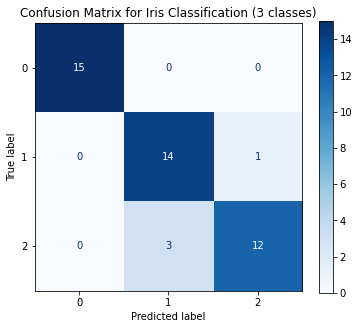

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the full Iris dataset (3 classes)
X, y = load_iris(return_X_y=True)

# Split into training and test sets (stratified to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train an SVM classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Iris Classification (3 classes)")
plt.show()


#### Precision, Recall, and F1-Score
The confusion matrix shows on the diagonal the correct predictions and on the off-diagonal the errors of a classifier. In some applications, it matters what kind of error a classifier makes. For example, in the medical domain, it matters in cancer detection whether the classifier either fails to discover when a patient has cancer, or if the classifier discovers all cases of cancer but also sometimes predicts that a healthy patient has cancer. Having a false alarm is not as costly as a missed cancer diagnosis. In addition, knowing about the type of error that a classifier is susceptible to, helps in understanding when to trust the classifier and when we should take the prediction with a grain of salt. To that end, it makes sense to consider precision, recall and the F1-score: 

- **Precision**: \\( \frac{TP}{TP + FP}  = \frac{TP}{\text{Predicted Positive}}\\) — how many predicted positives were correct.
- **Recall** (Sensitivity): \\( \frac{TP}{TP + FN}  = \frac{TP}{\text{Actual Positive}}\\) — how many actual positives were identified.
- **F1-Score**: Harmonic mean of precision and recall:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In a multiclass scenario, the precision can be computed class-wise as estimators of the probability that the class is actually $l$ if my classifier says so $p(y=l\mid\hat{y}=l)$. Correspondingly, the recall returns the estimated probability that my classifier predicts class $l$ if the actual class is actually $l$.  


#### ROC Curve and AUC

- The **ROC curve** plots the true positive rate (recall) against the false positive rate.
- The **Area Under the Curve (AUC)** summarizes the overall performance across thresholds.

AUC ranges from 0.5 (random) to 1.0 (perfect).

